In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
imphal_meteo = pd.read_csv('/kaggle/input/manipu-aqi/Manipur/Metrological Data/Imphal.csv', delimiter=',')
imphal_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,8.8,92,0.0,927.1,2.8,1.8,40,11
1,2024-01-01T01:00,7.7,94,0.0,927.9,4.7,3.6,337,354
2,2024-01-01T02:00,11.0,81,0.0,929.5,3.3,4.0,319,355
3,2024-01-01T03:00,13.7,72,0.0,930.4,1.9,2.3,292,321
4,2024-01-01T04:00,16.0,64,0.0,930.8,1.8,2.4,281,297
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,9.6,81,0.0,925.8,2.4,6.8,27,3
8780,2024-12-31T20:00,9.0,82,0.0,925.1,4.6,9.2,13,360
8781,2024-12-31T21:00,8.5,85,0.0,924.4,4.3,10.1,24,16
8782,2024-12-31T22:00,8.2,87,0.0,924.2,3.4,8.4,16,16


In [3]:
imphal_pollutants = pd.read_csv('/kaggle/input/manipu-aqi/Manipur/Pollutants/Imphal.csv', delimiter= ',')
imphal_pollutants['Timestamp'] = imphal_meteo['time']
imphal_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
imphal_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,125.92,32.94,7.34,7.71,15.92,4.66,55.44,0.74,NaN,...,1.82,10.64,93.24,0.58,117.98,0.0,0.0,0.07,NaN,NaN
1,2024-01-01T01:00,31.90,23.20,3.98,7.64,11.57,4.52,55.53,0.52,NaN,...,1.23,9.89,94.81,0.54,189.64,0.0,0.0,0.08,NaN,NaN
2,2024-01-01T02:00,46.97,16.12,3.82,6.59,10.50,8.98,55.29,0.46,NaN,...,1.06,9.32,96.08,0.40,164.11,0.0,0.0,0.04,NaN,NaN
3,2024-01-01T03:00,36.33,15.45,3.97,6.06,10.26,9.00,54.94,0.42,NaN,...,0.99,8.66,97.22,0.21,139.73,0.0,0.0,0.08,NaN,NaN
4,2024-01-01T04:00,38.79,16.58,4.28,5.71,10.36,8.95,54.84,0.42,NaN,...,0.97,8.19,98.02,0.22,171.08,0.0,0.0,0.09,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,NaN,NaN,17.34,21.38,39.99,4.23,85.98,1.40,NaN,...,1.88,13.83,52.56,0.71,141.72,0.0,0.0,0.00,NaN,NaN
8780,2024-12-31T20:00,NaN,NaN,8.63,18.10,26.09,3.10,85.90,1.27,NaN,...,1.72,12.78,53.93,0.41,166.37,0.0,0.0,0.00,NaN,NaN
8781,2024-12-31T21:00,NaN,NaN,9.09,17.67,26.37,3.24,84.85,1.45,NaN,...,1.98,11.71,26.27,0.32,120.66,0.0,0.0,0.00,NaN,NaN
8782,2024-12-31T22:00,NaN,NaN,6.15,15.82,21.03,2.61,84.34,1.30,NaN,...,1.75,11.20,25.25,0.36,130.45,0.0,0.0,0.00,NaN,NaN


In [4]:
imphal = pd.merge(imphal_meteo.iloc[:, :], imphal_pollutants.iloc[:, 0:3], on='time')
imphal

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,8.8,92,0.0,927.1,2.8,1.8,40,11,125.92,32.94
1,2024-01-01T01:00,7.7,94,0.0,927.9,4.7,3.6,337,354,31.90,23.20
2,2024-01-01T02:00,11.0,81,0.0,929.5,3.3,4.0,319,355,46.97,16.12
3,2024-01-01T03:00,13.7,72,0.0,930.4,1.9,2.3,292,321,36.33,15.45
4,2024-01-01T04:00,16.0,64,0.0,930.8,1.8,2.4,281,297,38.79,16.58
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,9.6,81,0.0,925.8,2.4,6.8,27,3,NaN,NaN
8780,2024-12-31T20:00,9.0,82,0.0,925.1,4.6,9.2,13,360,NaN,NaN
8781,2024-12-31T21:00,8.5,85,0.0,924.4,4.3,10.1,24,16,NaN,NaN
8782,2024-12-31T22:00,8.2,87,0.0,924.2,3.4,8.4,16,16,NaN,NaN


In [5]:
imphal['city'] = 'Imphal'
imphal

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,8.8,92,0.0,927.1,2.8,1.8,40,11,125.92,32.94,Imphal
1,2024-01-01T01:00,7.7,94,0.0,927.9,4.7,3.6,337,354,31.90,23.20,Imphal
2,2024-01-01T02:00,11.0,81,0.0,929.5,3.3,4.0,319,355,46.97,16.12,Imphal
3,2024-01-01T03:00,13.7,72,0.0,930.4,1.9,2.3,292,321,36.33,15.45,Imphal
4,2024-01-01T04:00,16.0,64,0.0,930.8,1.8,2.4,281,297,38.79,16.58,Imphal
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,9.6,81,0.0,925.8,2.4,6.8,27,3,NaN,NaN,Imphal
8780,2024-12-31T20:00,9.0,82,0.0,925.1,4.6,9.2,13,360,NaN,NaN,Imphal
8781,2024-12-31T21:00,8.5,85,0.0,924.4,4.3,10.1,24,16,NaN,NaN,Imphal
8782,2024-12-31T22:00,8.2,87,0.0,924.2,3.4,8.4,16,16,NaN,NaN,Imphal


In [6]:
imphal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             7305 non-null   float64
 10  PM10 (µg/m³)              6266 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [7]:
imphal = imphal.interpolate()
imphal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [8]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    imphal[delay1_col] = imphal[col].shift(1)
    delay2_col = col + "_delay2"
    imphal[delay2_col] = imphal[col].shift(2)
    imphal.loc[0, delay1_col] = imphal[col].iloc[-1]
    imphal.loc[1, delay2_col] = imphal[col].iloc[-1]
    imphal.loc[0, delay2_col] = imphal[col].iloc[-2]

imphal

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,8.8,92,0.0,927.1,2.8,1.8,40,11,125.92,32.94,Imphal,9.47,9.47,30.72,30.72
1,2024-01-01T01:00,7.7,94,0.0,927.9,4.7,3.6,337,354,31.90,23.20,Imphal,125.92,9.47,32.94,30.72
2,2024-01-01T02:00,11.0,81,0.0,929.5,3.3,4.0,319,355,46.97,16.12,Imphal,31.90,125.92,23.20,32.94
3,2024-01-01T03:00,13.7,72,0.0,930.4,1.9,2.3,292,321,36.33,15.45,Imphal,46.97,31.90,16.12,23.20
4,2024-01-01T04:00,16.0,64,0.0,930.8,1.8,2.4,281,297,38.79,16.58,Imphal,36.33,46.97,15.45,16.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,9.6,81,0.0,925.8,2.4,6.8,27,3,9.47,30.72,Imphal,9.47,9.47,30.72,30.72
8780,2024-12-31T20:00,9.0,82,0.0,925.1,4.6,9.2,13,360,9.47,30.72,Imphal,9.47,9.47,30.72,30.72
8781,2024-12-31T21:00,8.5,85,0.0,924.4,4.3,10.1,24,16,9.47,30.72,Imphal,9.47,9.47,30.72,30.72
8782,2024-12-31T22:00,8.2,87,0.0,924.2,3.4,8.4,16,16,9.47,30.72,Imphal,9.47,9.47,30.72,30.72


In [9]:
manipur_data = imphal
manipur_data

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,8.8,92,0.0,927.1,2.8,1.8,40,11,125.92,32.94,Imphal,9.47,9.47,30.72,30.72
1,2024-01-01T01:00,7.7,94,0.0,927.9,4.7,3.6,337,354,31.90,23.20,Imphal,125.92,9.47,32.94,30.72
2,2024-01-01T02:00,11.0,81,0.0,929.5,3.3,4.0,319,355,46.97,16.12,Imphal,31.90,125.92,23.20,32.94
3,2024-01-01T03:00,13.7,72,0.0,930.4,1.9,2.3,292,321,36.33,15.45,Imphal,46.97,31.90,16.12,23.20
4,2024-01-01T04:00,16.0,64,0.0,930.8,1.8,2.4,281,297,38.79,16.58,Imphal,36.33,46.97,15.45,16.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,9.6,81,0.0,925.8,2.4,6.8,27,3,9.47,30.72,Imphal,9.47,9.47,30.72,30.72
8780,2024-12-31T20:00,9.0,82,0.0,925.1,4.6,9.2,13,360,9.47,30.72,Imphal,9.47,9.47,30.72,30.72
8781,2024-12-31T21:00,8.5,85,0.0,924.4,4.3,10.1,24,16,9.47,30.72,Imphal,9.47,9.47,30.72,30.72
8782,2024-12-31T22:00,8.2,87,0.0,924.2,3.4,8.4,16,16,9.47,30.72,Imphal,9.47,9.47,30.72,30.72


In [10]:
manipur_data['city'] = manipur_data['city'].astype('category')

In [11]:
input_cols, target_cols = ['temperature_2m (°C)', 'relative_humidity_2m (%)', 'rain (mm)',
       'surface_pressure (hPa)', 'wind_speed_10m (km/h)',
       'wind_speed_100m (km/h)', 'wind_direction_10m (°)',
       'wind_direction_100m (°)', 'city', 'PM2.5 (µg/m³)_delay1', 'PM2.5 (µg/m³)_delay2', 'PM10 (µg/m³)_delay1',
       'PM10 (µg/m³)_delay2'], ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']

In [12]:
X, y = manipur_data[input_cols], manipur_data[target_cols]

In [13]:
from xgboost import XGBRegressor

In [14]:
model = XGBRegressor(
    tree_method='gpu_hist',
    n_estimators=50,
    learning_rate=0.1,
    min_child_weight=5,
    enable_categorical=True,
)

In [15]:
model.fit(X, y['PM2.5 (µg/m³)'], verbose = True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [16]:
pred_check = model.predict(X)

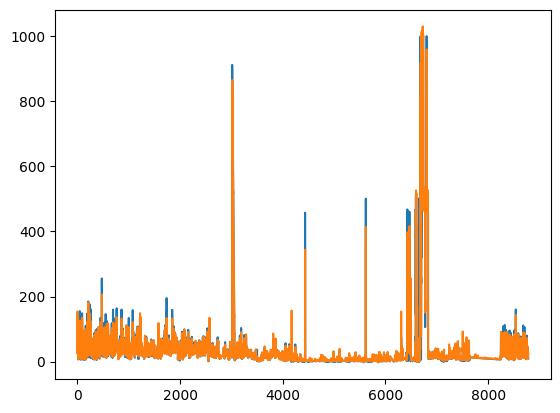

In [17]:
plt.plot(y['PM2.5 (µg/m³)'])
plt.plot(pred_check)
plt.show()

In [18]:
from sklearn.metrics import r2_score

r2 = r2_score(y['PM2.5 (µg/m³)'], pred_check)
print("R² score:", r2)

R² score: 0.9783918133242758


In [19]:
import joblib
joblib.dump(model, 'Manipur_PM2.5_µgm³.pkl')

['Manipur_PM2.5_µgm³.pkl']

In [20]:
model.fit(X, y['PM10 (µg/m³)'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [21]:
pred_check2 = model.predict(X)

In [22]:
r2 = r2_score(y['PM10 (µg/m³)'], pred_check2)
print("R² score:", r2)

R² score: 0.8999704346801324


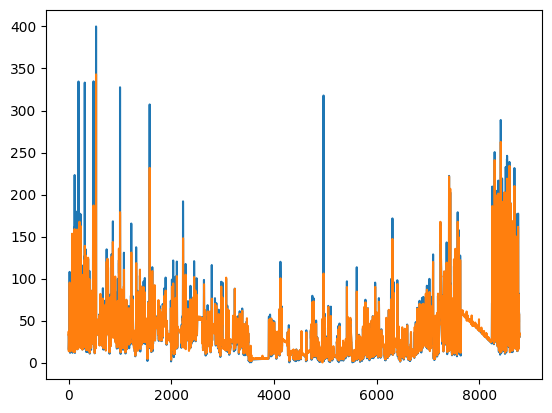

In [23]:
plt.plot(y['PM10 (µg/m³)'])
plt.plot(pred_check2)
plt.show()

In [24]:
joblib.dump(model, 'Manipur_PM10_µgm³.pkl')

['Manipur_PM10_µgm³.pkl']